<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Boston Housing Analysis

## Introduction
In this project, we analyze the Boston Housing dataset to provide insights to upper management. The analysis includes generating descriptive statistics, visualizations, and performing statistical tests to answer specific questions related to housing prices.
This is my final assignment for the IBM course Statistics for Data Science with Python.

### Task 1: Familiarize Yourself with the Dataset

#### 1.1 Load and Examine the Dataset

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### 1.2 Reading the data of the CSV file from the URL

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### 1.3 Analysing the first few rows of the dataset

In [24]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV           AGE_GROUP  
0  296.0     15.3   4.98  24.0      35 to 70 years  
1  242.0     17.8   9.14  21.6  70 years and older  
2  242.0     17.8   4.03  34.7      35 to 70 years  
3  222.0     18.7   2.94  33.4      35 to 70 years  
4  222.0     18.7   5.33  36.2      35 to 70 years  


#### 1.4 Taking a look at the summary statistics

In [23]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

#### 1.5 Checking for any missing values

In [22]:
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE_GROUP     0
dtype: int64


#### Relevant observations:
+ The dataset consists of various features related to housing prices in Boston, such as crime rate, average number of rooms, age of buildings, and median home value.
+ No missing values were found in the dataset, ensuring a complete analysis without the need for data imputation.

##

### Task 2: Generate Descriptive Statistics and Visualizations

#### 2.1 Boxplot for "Median value of owner-occupied homes"

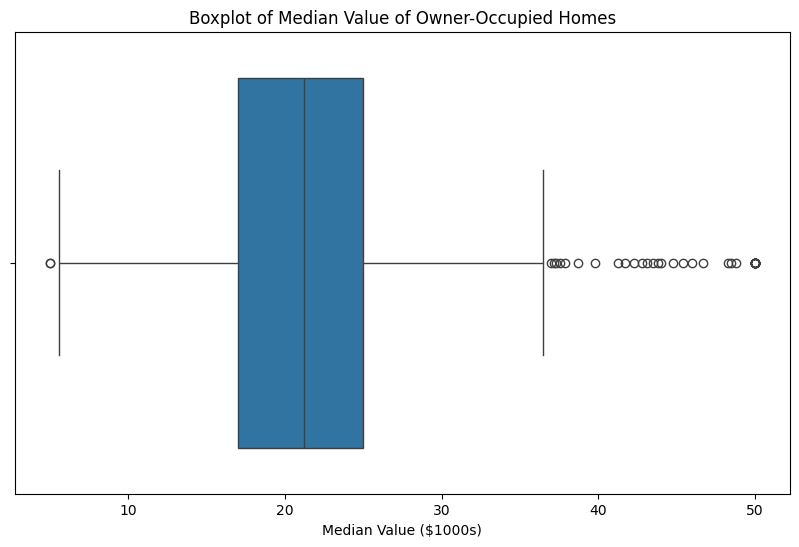

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.show()

#### Relevant observations from this Boxplot:
+ The boxplot shows the distribution of median home values, where we can detect some outliers in the data, with median values extending beyond $50,000.

##

#### 2.2 Bar Plot for the Charles River Variable

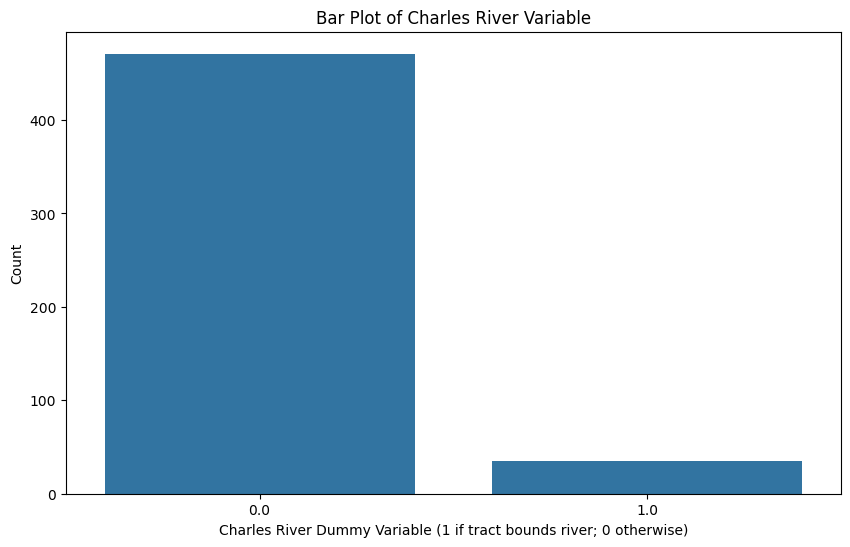

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

#### Relevant observations from this Bar Plot:
+ The bar plot shows the distribution of homes bounded by the Charles River, where we can observe that there are fewer homes bounded by the Charles River compared to those not bounded by it.

##

#### 2.3 Boxplot for MEDV vs. AGE (Discretized)

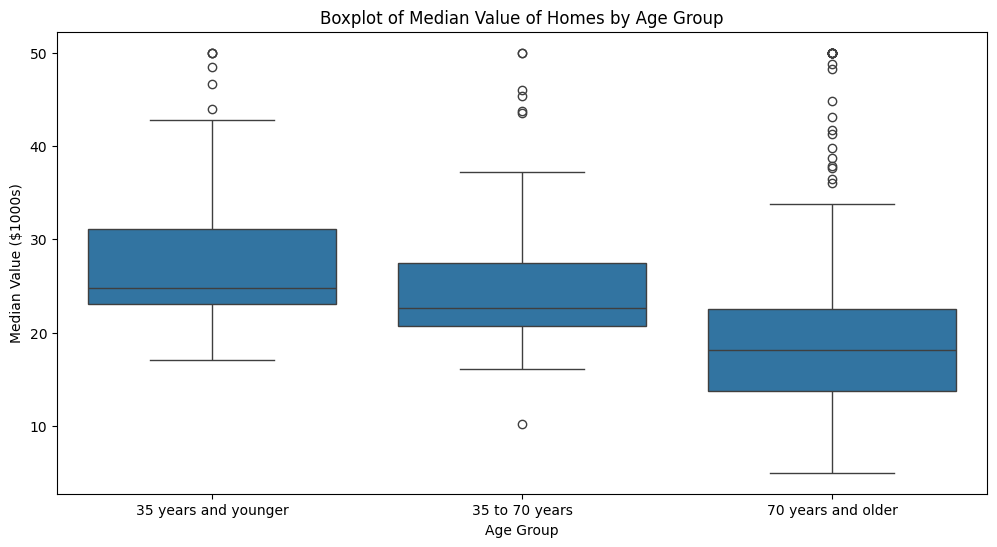

In [27]:
# Discretize AGE into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

#### Relevant observations from this Boxplot:
+ The boxplot shows the median home values across different age groups, where is possible to observe that homes in the "35 years and younger" group tend to have higher median values compared to the other two groups.

##

#### 2.4 Scatter Plot for Nitric Oxide vs. Non-Retail Business Acres

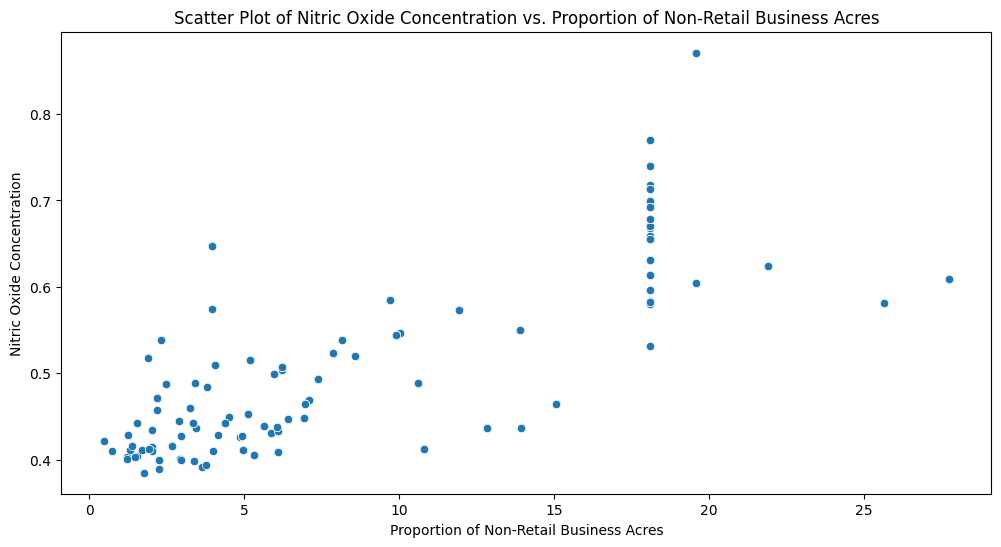

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentration')
plt.show()

#### Relevant observations from this Scatter Plot:
+ The scatter plot indicates a positive relationship between nitric oxide concentration and the proportion of non-retail business acres.
+ Higher proportions of non-retail business acres are associated with higher nitric oxide concentrations.

##

#### 2.5 Histogram for Pupil-Teacher Ratio

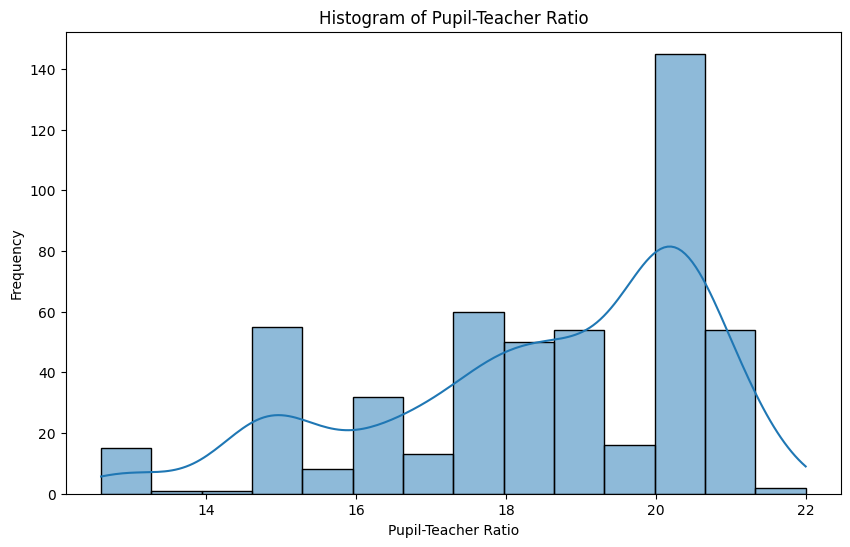

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

#### Relevant observations from this Histogram:
+ The histogram shows the distribution of pupil-teacher ratios across different towns.
+ The majority of towns have a pupil-teacher ratio between 14 and 20.

##

### Task 3: Use the Appropriate Tests

#### 3.1 T-test for Charles River Variable
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: There is no significant difference in median values of houses bounded by the Charles River.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a significant difference in median values of houses bounded by the Charles River.

In [18]:
# T-test for Charles River Variable
from scipy import stats

# Separate data based on CHAS
river_data = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_data = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(river_data, not_river_data)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


#### Observations and conclusion from this T-test:
+ The p-value is less than 0.05, indicating a significant difference in median values of houses bounded by the Charles River.

##

#### 3.2 Perform ANOVA for Proportion of Owner-Occupied Units Built Before 1940
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: All groups have the same median value of homes.
- **Alternative Hypothesis (H<sub>1</sub>)**: At least one group has a different median value.

In [30]:
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


#### Observations and conclusion from the ANOVA:
+ The ANOVA results show a significant difference in median home values across different age groups of buildings.

##

#### 3.3 Pearson Correlation for Nitric Oxide and Non-Retail Business Acres
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: There is no correlation between NOX and INDUS.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a correlation between NOX and INDUS.

In [31]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation coefficient: {corr}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant correlation.


#### Observations and conclusion from the test:
+ The p-value is less than 0.05, indicating a significant positive correlation between nitric oxide concentration and the proportion of non-retail business acres.

#### 3.4 Regression Analysis for Distance to Employment Centers

**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: The weighted distance to employment centers has no impact on median home value.
- **Alternative Hypothesis (H<sub>1</sub>)**: The weighted distance to employment centers impacts the median home value.

In [32]:
# Define the model
model = sm.OLS(boston_df['MEDV'], sm.add_constant(boston_df['DIS'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        12:25:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Observations and conclusion from this Regression Analysis:
+ The regression analysis indicates that the weighted distance to employment centers has a significant impact on median home values. 
+ The coefficient for DIS is negative, suggesting that as the distance increases, the median home value decreases.

##

## Final Observations and Conclusions
Based on the analysis of the Boston housing dataset, we can provide the following insights to upper management:

1. **Median Value of Homes Bounded by the Charles River:**

+ There is a significant difference in the median values of homes that are bounded by the Charles River compared to those that are not.
+ Homes near the river tend to have higher median values.

2. **Median Values of Homes by Age Groups:**

+ There is a significant difference in median home values across different age groups.
+ Homes that are 35 years and younger tend to have higher median values compared to older homes.

3. **Relationship Between Nitric Oxide Concentration and Non-Retail Business Acres:**

+ There is a significant positive correlation between nitric oxide concentration and the proportion of non-retail business acres.
+ Areas with higher non-retail business activity tend to have higher nitric oxide levels.

4. **Impact of Distance to Employment Centers on Median Home Values:**
+ The distance to employment centers has a significant negative impact on median home values.
+ As the distance increases, the median home value decreases.

Based on these insights, upper management can make more informed decisions regarding housing policies, environmental regulations, and urban planning in Boston.

Hope you enjoyed this analysis work and found it useful, see you next time!